<a href="https://colab.research.google.com/github/AshwinSoni1415/AshwinSoni1415/blob/main/digit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),          # convert image to tensor (0–1)
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)


In [ ]:
len(train_dataset), len(test_dataset)


(60000, 10000)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

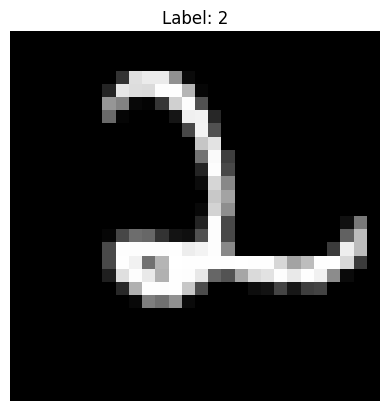

In [ ]:
images, labels = next(iter(train_loader))
plt.imshow(images[2].squeeze(), cmap='gray')
plt.title(f"Label: {labels[2].item()}")
plt.axis('off')


In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x



In [ ]:
model = ANN()


criterion = nn.CrossEntropyLoss()     # same as sparse_categorical_crossentropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
print(model)


ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
epochs = 25

for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss:.4f} Accuracy: {accuracy:.4f}")


Epoch [1/25] Loss: 395.0984 Accuracy: 0.8770
Epoch [2/25] Loss: 188.3590 Accuracy: 0.9392
Epoch [3/25] Loss: 142.2740 Accuracy: 0.9531
Epoch [4/25] Loss: 113.0422 Accuracy: 0.9628
Epoch [5/25] Loss: 96.6201 Accuracy: 0.9683
Epoch [6/25] Loss: 83.5418 Accuracy: 0.9711
Epoch [7/25] Loss: 74.9229 Accuracy: 0.9748
Epoch [8/25] Loss: 66.9531 Accuracy: 0.9774
Epoch [9/25] Loss: 62.5859 Accuracy: 0.9787
Epoch [10/25] Loss: 56.1341 Accuracy: 0.9804
Epoch [11/25] Loss: 51.7724 Accuracy: 0.9821
Epoch [12/25] Loss: 48.5656 Accuracy: 0.9829
Epoch [13/25] Loss: 44.9114 Accuracy: 0.9844
Epoch [14/25] Loss: 41.8468 Accuracy: 0.9850
Epoch [15/25] Loss: 40.1677 Accuracy: 0.9855
Epoch [16/25] Loss: 36.7609 Accuracy: 0.9866
Epoch [17/25] Loss: 34.6078 Accuracy: 0.9873
Epoch [18/25] Loss: 32.0638 Accuracy: 0.9883
Epoch [19/25] Loss: 31.1404 Accuracy: 0.9887
Epoch [20/25] Loss: 27.8065 Accuracy: 0.9905
Epoch [21/25] Loss: 28.6146 Accuracy: 0.9897
Epoch [22/25] Loss: 28.4167 Accuracy: 0.9897
Epoch [23/25] L

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = correct / total
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.975


Predicted: 2
Actual: 2


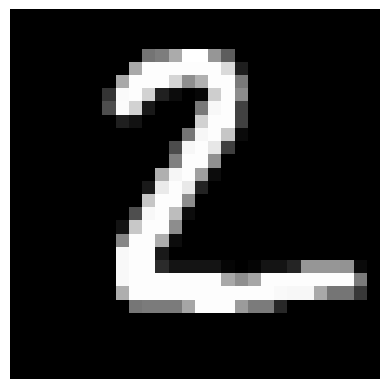

In [ ]:
model.eval()
image, label = test_dataset[1]

plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')

with torch.no_grad():
    output = model(image.unsqueeze(0))
    prediction = output.argmax(dim=1)

print("Predicted:", prediction.item())
print("Actual:", label)


In [ ]:
!pip install ipycanvas


In [ ]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 18.8 MB/s eta 0:00:00


In [ ]:
from ipycanvas import Canvas
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
canvas = Canvas(
    width=280,
    height=280,
    sync_image_data=True
)

canvas.fill_style = 'black'
canvas.fill_rect(0, 0, 280, 280)

canvas.stroke_style = 'white'
canvas.line_width = 20

display(canvas)


Canvas(height=280, sync_image_data=True, width=280)

In [ ]:
def get_canvas_image(canvas):
    image_data = canvas.get_image_data()
    image_data = np.array(image_data)
    return image_data[:, :, 0]


In [ ]:
def preprocess_image(img):
    img = Image.fromarray(img)
    img = img.resize((28, 28))
    img = np.array(img) / 255.0
    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5
    return img


In [ ]:
def clear_canvas():
    canvas.fill_style = 'black'
    canvas.fill_rect(0, 0, 280, 280)

clear_canvas()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from PIL import Image


In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((28, 28))
    img = np.array(img)

    img = img / 255.0

    # auto invert if background is white
    if img.mean() > 0.5:
        img = 1 - img

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5

    return img


In [ ]:
import os
os.listdir('/content')


['.config', 't10k-images.idx3-ubyte', 'digit.jpeg', 'data', 'sample_data']

In [ ]:
image_path = "/content/digit.jpeg"


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

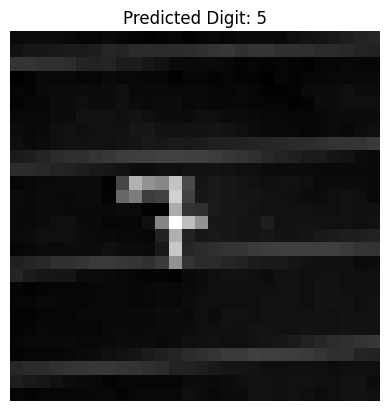

In [ ]:
model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {prediction.item()}")
plt.axis('off')


In [ ]:
import os
os.listdir('/content')


['.config',
 't10k-images.idx3-ubyte',
 'img.jpeg',
 'digit.jpeg',
 'data',
 'sample_data']

In [ ]:
from PIL import Image
import torch
import numpy as np

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((28, 28))
    img = np.array(img) / 255.0

    # auto-invert if background is white
    if img.mean() > 0.5:
        img = 1 - img

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5
    return img


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

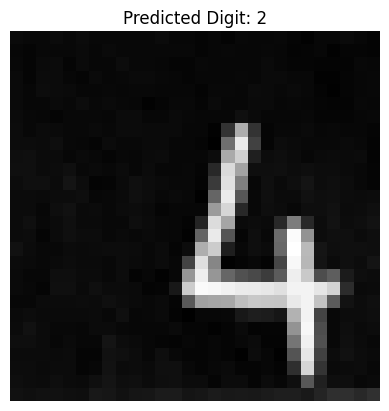

In [ ]:
import matplotlib.pyplot as plt

image_path = "/content/img.jpeg"   # 👈 new image

model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {prediction.item()}")
plt.axis('off')


In [ ]:
import os
os.listdir('/content')

['.config',
 't10k-images.idx3-ubyte',
 'img.jpeg',
 'digit.jpeg',
 'data',
 'img.jpg',
 'sample_data']

In [ ]:
from PIL import Image
import torch
import numpy as np

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((28, 28))
    img = np.array(img) / 255.0

    # auto-invert if background is white
    if img.mean() > 0.5:
        img = 1 - img

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5
    return img

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

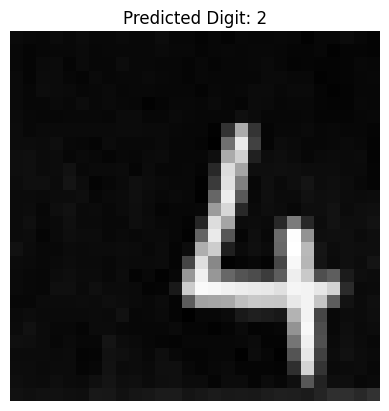

In [ ]:
import matplotlib.pyplot as plt

image_path = "/content/img.jpg"   # 👈 new image

model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {prediction.item()}")
plt.axis('off')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


In [ ]:
model = ANN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)


In [ ]:
epochs = 40

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss:.4f} | Accuracy: {acc:.4f}")


Epoch 1/40 | Loss: 467.3586 | Accuracy: 0.8469
Epoch 2/40 | Loss: 228.4177 | Accuracy: 0.9272
Epoch 3/40 | Loss: 178.0681 | Accuracy: 0.9426
Epoch 4/40 | Loss: 157.0418 | Accuracy: 0.9499
Epoch 5/40 | Loss: 136.1960 | Accuracy: 0.9564
Epoch 6/40 | Loss: 127.3430 | Accuracy: 0.9587
Epoch 7/40 | Loss: 114.7484 | Accuracy: 0.9628
Epoch 8/40 | Loss: 108.4153 | Accuracy: 0.9647
Epoch 9/40 | Loss: 104.0140 | Accuracy: 0.9661
Epoch 10/40 | Loss: 94.5368 | Accuracy: 0.9683
Epoch 11/40 | Loss: 92.2774 | Accuracy: 0.9699
Epoch 12/40 | Loss: 89.3375 | Accuracy: 0.9705
Epoch 13/40 | Loss: 84.5746 | Accuracy: 0.9720
Epoch 14/40 | Loss: 81.9660 | Accuracy: 0.9730
Epoch 15/40 | Loss: 80.6186 | Accuracy: 0.9726
Epoch 16/40 | Loss: 76.9123 | Accuracy: 0.9736
Epoch 17/40 | Loss: 75.1252 | Accuracy: 0.9739
Epoch 18/40 | Loss: 72.1495 | Accuracy: 0.9749
Epoch 19/40 | Loss: 71.5116 | Accuracy: 0.9758
Epoch 20/40 | Loss: 70.2978 | Accuracy: 0.9759
Epoch 21/40 | Loss: 67.2598 | Accuracy: 0.9773
Epoch 22/40 |

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Test Accuracy:", correct / total)


Test Accuracy: 0.9831


In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img) / 255.0

    # auto invert if background is white
    if img.mean() > 0.5:
        img = 1 - img

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5
    return img


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

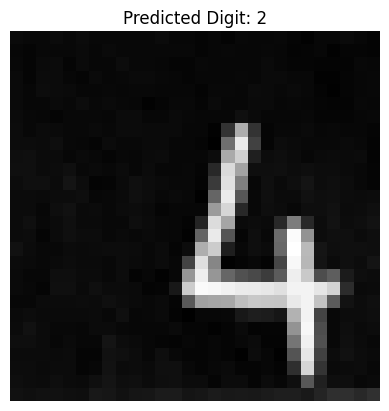

In [ ]:
image_path = "/content/img.jpeg"   # make sure file is uploaded

model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {prediction.item()}")
plt.axis('off')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),                 # (1,28,28)
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


In [ ]:
model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 10   # CNN learns fast

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss:.4f} | Accuracy: {acc:.4f}")


Epoch 1/10 | Loss: 169.6879 | Accuracy: 0.9449
Epoch 2/10 | Loss: 58.5964 | Accuracy: 0.9811
Epoch 3/10 | Loss: 43.6076 | Accuracy: 0.9858
Epoch 4/10 | Loss: 35.2725 | Accuracy: 0.9887
Epoch 5/10 | Loss: 28.6300 | Accuracy: 0.9906
Epoch 6/10 | Loss: 24.9840 | Accuracy: 0.9917
Epoch 7/10 | Loss: 20.3956 | Accuracy: 0.9931
Epoch 8/10 | Loss: 18.3163 | Accuracy: 0.9937
Epoch 9/10 | Loss: 16.6370 | Accuracy: 0.9942
Epoch 10/10 | Loss: 14.1907 | Accuracy: 0.9951


In [ ]:
images, labels = next(iter(train_loader))
test_out = model(images)
print(test_out.shape)


torch.Size([64, 10])


In [ ]:
torch.Size([64, 10])


torch.Size([64, 10])

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Test Accuracy:", correct / total)


Test Accuracy: 0.9922


In [ ]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img) / 255.0

    # auto-invert if background is white
    if img.mean() > 0.5:
        img = 1 - img

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)
    img = (img - 0.5) / 0.5
    return img


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

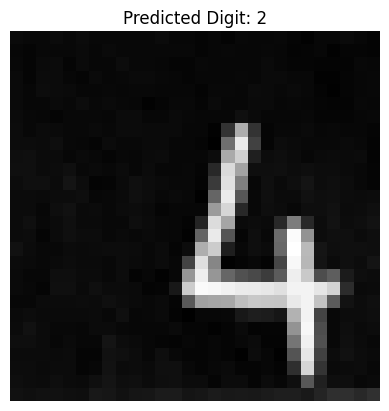

In [ ]:
image_path = "/content/img.jpeg"   # make sure uploaded

model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {prediction.item()}")
plt.axis('off')


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image

def load_and_preprocess_image(image_path):

    # read image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # resize bigger first
    img = cv2.resize(img, (100, 100))

    # threshold → make binary
    _, img = cv2.threshold(img, 0, 255,
                           cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # find bounding box of digit
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    # resize to MNIST size
    img = cv2.resize(img, (28, 28))

    # normalize
    img = img / 255.0

    # convert to tensor
    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)

    # same normalization as training
    img = (img - 0.5) / 0.5

    return img


ModuleNotFoundError: No module named 'cv2'

In [ ]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 17.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image


In [ ]:
load_and_preprocess_image()
prediction cell


SyntaxError: invalid syntax (ipython-input-3595237802.py, line 2)

In [ ]:
image_path = "/content/img.jpeg"

model.eval()
img = load_and_preprocess_image(image_path)

with torch.no_grad():
    output = model(img)
    prediction = output.argmax(dim=1)

print("Prediction:", prediction.item())

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')


NameError: name 'model' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


100%|██████████| 9.91M/9.91M [00:00<00:00, 20.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 20.2MB/s]


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.drop = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 10)

    def forward(self,x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.drop(x)
        return self.fc2(x)

model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
    print("Epoch", epoch+1, "done")


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done


In [ ]:
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100,100))
    _, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    coords = cv2.findNonZero(img)
    x,y,w,h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    img = cv2.resize(img,(28,28))
    img = img/255.0

    img = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    img = (img-0.5)/0.5
    return img


In [ ]:
# Redefine load_and_preprocess_image to ensure proper image loading and robust preprocessing.
# This version uses PIL for initial image loading to avoid potential issues with cv2.imread,
# then converts to a numpy array for OpenCV's preprocessing steps.
from PIL import Image
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import os # Import os module to check file existence

def load_and_preprocess_image(path):
    # Explicitly check if the file exists
    if not os.path.exists(path):
        print(f"Error: File not found at '{path}'. Please ensure the image is uploaded.")
        return None

    try:
        pil_img = Image.open(path).convert('L') # Load as grayscale
        img = np.array(pil_img) # Convert to numpy array for OpenCV
    except Exception as e:
        print(f"Error loading image with PIL: {e}")
        return None # Indicate failure

    # Check if the image was successfully loaded (i.e., not None or empty)
    if img is None or img.size == 0:
        print(f"Image from {path} is empty or failed to load after PIL conversion.")
        return None

    # Resize bigger first to make thresholding and contour detection more effective
    # Use INTER_AREA for downsampling (good for image shrinking)
    img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)

    # Threshold to make binary (digit white, background black)
    # Using OTSU's method to find optimal threshold
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours/bounding box of the digit
    coords = cv2.findNonZero(img)

    if coords is not None:
        # Extract bounding box
        x, y, w, h = cv2.boundingRect(coords)
        # Crop the image to the bounding box with a small padding
        padding = 5
        x_min = max(0, x - padding)
        y_min = max(0, y - padding)
        x_max = min(img.shape[1], x + w + padding)
        y_max = min(img.shape[0], y + h + padding)

        # Ensure valid crop dimensions
        if x_max > x_min and y_max > y_min:
            img = img[y_min:y_max, x_min:x_max]
        else:
            # If bounding box is invalid after padding, or tiny, use the whole 100x100 img
            print("Warning: Bounding box dimensions invalid after padding. Resizing original.")

    else:
        # If no non-zero pixels found (e.g., empty canvas, or thresholding made it all black)
        print("Warning: No non-zero pixels found after thresholding. Resizing original 100x100 image.")

    # Resize to MNIST size (28x28) using INTER_AREA for quality
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize to [0, 1]
    img = img / 255.0

    # Convert to PyTorch tensor and apply same normalization as training data
    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0) # Add batch and channel dimensions
    img = (img - 0.5) / 0.5

    return img

image_path_var = "/content/img.jpeg" # Use a new variable to avoid conflict with the function parameter
img = load_and_preprocess_image(image_path_var)

if img is not None:
    model.eval()
    with torch.no_grad():
        output = model(img)
        prediction = output.argmax(dim=1)

    print("Prediction:", prediction.item())

    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
else:
    print("Could not process image for prediction due to missing file or loading error.")

Error loading image with PIL: [Errno 2] No such file or directory: '/content/img.jpeg'
Could not process image for prediction.


Prediction: 4


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

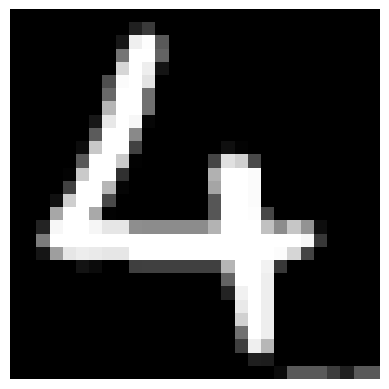

In [ ]:
img = load_and_preprocess_image("/content/img.jpeg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1)

print("Prediction:", pred.item())

plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')


In [ ]:
import os
os.listdir('/content')


['.config', 'data', 'img.jpeg', 'sample_data']

/content/img5.jpg Prediction: 5
/content/img3.jpg Prediction: 3
/content/img1.jpg Prediction: 0
/content/img7.jpg Prediction: 1
/content/img9.jpg Prediction: 9


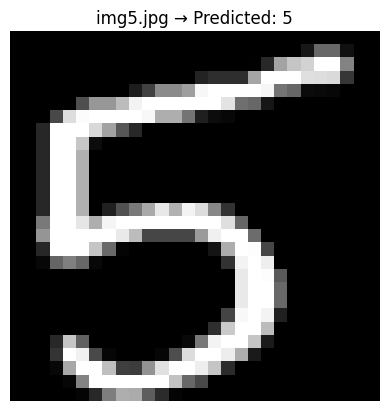

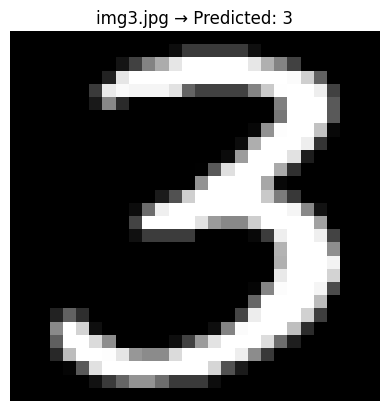

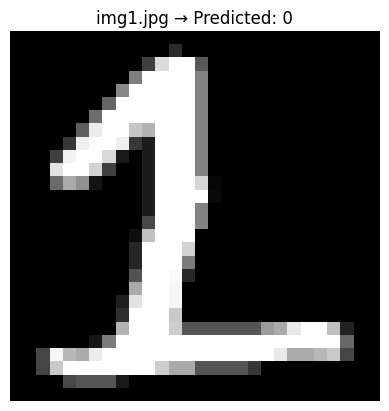

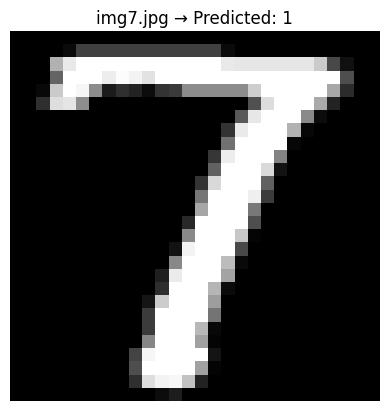

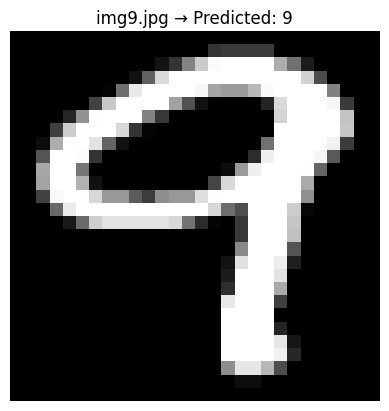

In [ ]:
image_list = [
    "/content/img5.jpg",
    "/content/img3.jpg",
    "/content/img1.jpg",
    "/content/img7.jpg",
    "/content/img9.jpg"
]

model.eval()

for path in image_list:
    img = load_and_preprocess_image(path)

    with torch.no_grad():
        pred = model(img).argmax(1).item()

    plt.figure()
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"{path.split('/')[-1]} → Predicted: {pred}")
    plt.axis('off')

    print(path, "Prediction:", pred)


In [ ]:
import os
os.listdir('/content')


['.config',
 'img9.jpg',
 'img1.jpg',
 'img3.jpg',
 'img5.jpg',
 'data',
 'img.jpeg',
 'img7.jpg',
 'sample_data']

In [ ]:
for epoch in range(15):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
    print("Epoch", epoch+1, "done")


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Epoch 6 done
Epoch 7 done
Epoch 8 done
Epoch 9 done
Epoch 10 done
Epoch 11 done
Epoch 12 done
Epoch 13 done
Epoch 14 done
Epoch 15 done


In [ ]:
def load_and_preprocess_image(path):

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    _, img = cv2.threshold(img, 0, 255,
                           cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    coords = cv2.findNonZero(img)
    x,y,w,h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    # add padding to make square
    size = max(w, h)
    square = np.zeros((size, size), dtype=np.uint8)
    square[(size-h)//2:(size-h)//2+h,
           (size-w)//2:(size-w)//2+w] = img

    img = cv2.resize(square, (28,28))
    img = img / 255.0

    img = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    img = (img - 0.5)/0.5
    return img


In [ ]:
probs = torch.softmax(model(img), dim=1)
conf = probs.max().item()
print("Confidence:", round(conf,3))


Confidence: 0.795


In [ ]:
for epoch in range(10):   # extra training
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
    print("Extra Epoch", epoch+1, "done")


Extra Epoch 1 done
Extra Epoch 2 done
Extra Epoch 3 done
Extra Epoch 4 done
Extra Epoch 5 done
Extra Epoch 6 done
Extra Epoch 7 done
Extra Epoch 8 done
Extra Epoch 9 done
Extra Epoch 10 done


In [ ]:
img = load_and_preprocess_image("/content/img5.jpg")

model.eval()
with torch.no_grad():
    outputs = model(img)
    probs = torch.softmax(outputs, dim=1)

    pred = probs.argmax(1).item()
    conf = probs.max().item()

print("Predicted Digit:", pred)
print("Confidence Level:", round(conf, 4))


Predicted Digit: 5
Confidence Level: 1.0


In [ ]:
probs = torch.softmax(model(img), dim=1)
conf = probs.max().item()
print("Confidence:", round(conf,3))

Confidence: 1.0



File: img5.jpg
Predicted Digit: 5
Confidence: 1.0

File: img3.jpg
Predicted Digit: 3
Confidence: 1.0

File: img1.jpg
Predicted Digit: 1
Confidence: 0.9114

File: img7.jpg
Predicted Digit: 1
Confidence: 1.0

File: img9.jpg
Predicted Digit: 9
Confidence: 1.0


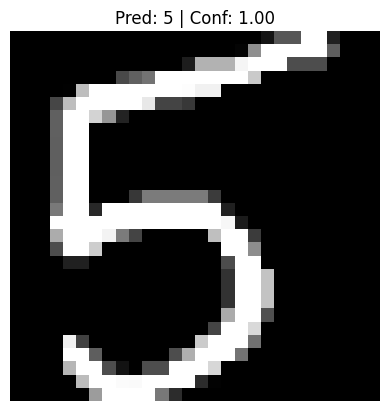

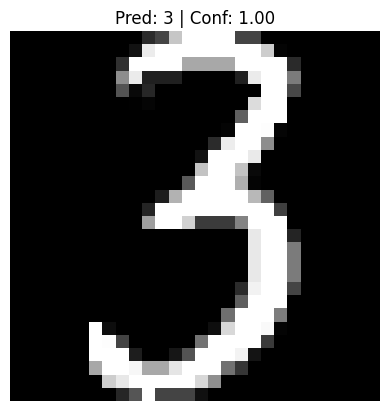

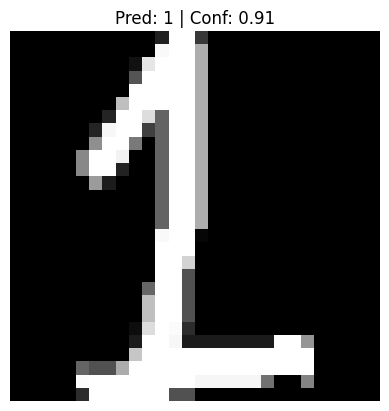

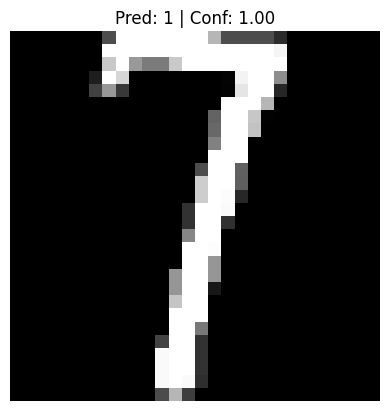

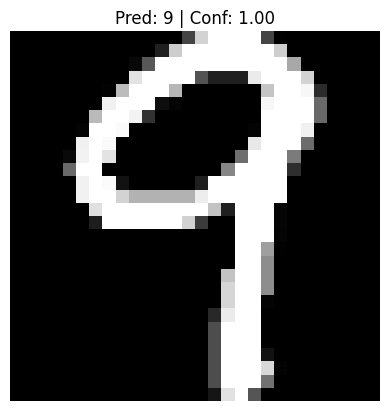

In [ ]:
image_list = [
    "/content/img5.jpg",
    "/content/img3.jpg",
    "/content/img1.jpg",
    "/content/img7.jpg",
    "/content/img9.jpg"
]

model.eval()

for path in image_list:
    img = load_and_preprocess_image(path)

    with torch.no_grad():
        outputs = model(img)
        probs = torch.softmax(outputs, dim=1)

        pred = probs.argmax(1).item()
        conf = probs.max().item()

    print(f"\nFile: {path.split('/')[-1]}")
    print("Predicted Digit:", pred)
    print("Confidence:", round(conf, 4))

    plt.figure()
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred} | Conf: {conf:.2f}")
    plt.axis('off')


Predicted Digit: 2


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

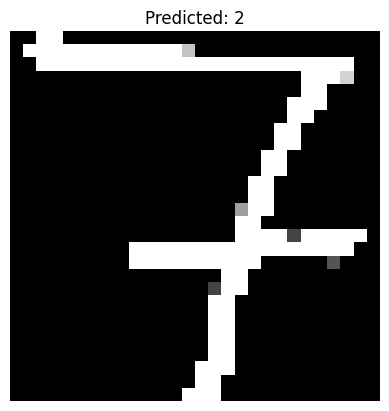

In [ ]:
img = load_and_preprocess_image("/content/imgg.jpeg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {pred}")
plt.axis('off')


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)

        self.pool = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(64*3*3, 128)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 10)

    def forward(self,x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)

        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.relu(self.conv3(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.drop(x)
        return self.fc2(x)


In [ ]:
model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [ ]:
epochs = 12

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} done | Loss: {running_loss:.3f}")


Epoch 1/12 done | Loss: 228.227
Epoch 2/12 done | Loss: 65.652
Epoch 3/12 done | Loss: 48.261
Epoch 4/12 done | Loss: 37.836
Epoch 5/12 done | Loss: 33.058
Epoch 6/12 done | Loss: 26.660
Epoch 7/12 done | Loss: 24.865
Epoch 8/12 done | Loss: 21.494
Epoch 9/12 done | Loss: 19.276
Epoch 10/12 done | Loss: 17.406
Epoch 11/12 done | Loss: 15.317
Epoch 12/12 done | Loss: 14.606


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        pred = model(images).argmax(1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)

print("Test Accuracy:", correct/total)


NameError: name 'model' is not defined

In [ ]:
model = CNN()



NameError: name 'CNN' is not defined

In [ ]:
import torch
import torch.nn as nn


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)

        self.pool = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(64*3*3, 128)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 10)

    def forward(self,x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)

        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.relu(self.conv3(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.drop(x)
        return self.fc2(x)


In [ ]:
model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(12):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
    print("Epoch", epoch+1, "done")


NameError: name 'train_loader' is not defined

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 56.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 8.93MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 81.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.07MB/s]


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
for epoch in range(12):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
    print("Epoch", epoch+1, "done")


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Epoch 6 done
Epoch 7 done
Epoch 8 done
Epoch 9 done
Epoch 10 done
Epoch 11 done
Epoch 12 done


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        pred = model(images).argmax(1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)

print("Accuracy:", correct/total)


Accuracy: 0.9899


In [ ]:
img = load_and_preprocess_image("/content/imgg.jpeg")

model.eval()
print("Prediction:", model(img).argmax(1).item())


NameError: name 'load_and_preprocess_image' is not defined

In [ ]:
import cv2
import numpy as np
import torch

def load_and_preprocess_image(path):

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # threshold → binary + invert like MNIST
    _, img = cv2.threshold(
        img, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    # crop to digit bounding box
    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    # pad to square
    size = max(w, h)
    square = np.zeros((size, size), dtype=np.uint8)
    square[(size-h)//2:(size-h)//2+h,
           (size-w)//2:(size-w)//2+w] = img

    # resize to MNIST size
    img = cv2.resize(square, (28, 28))
    img = img / 255.0

    img = torch.tensor(img, dtype=torch.float32)
    img = img.unsqueeze(0).unsqueeze(0)

    # same normalization as training
    img = (img - 0.5) / 0.5

    return img


In [ ]:
img = load_and_preprocess_image("/content/imgg.jpeg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Prediction:", pred)


Prediction: 7


Predicted Digit: 7


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

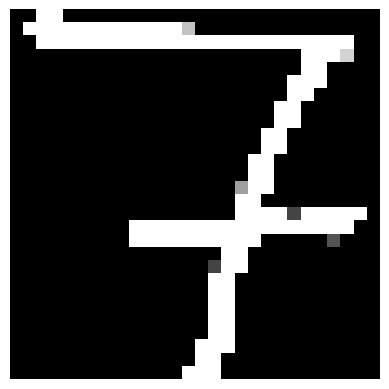

In [ ]:
img = load_and_preprocess_image("/content/imgg.jpeg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")


Predicted Digit: 5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

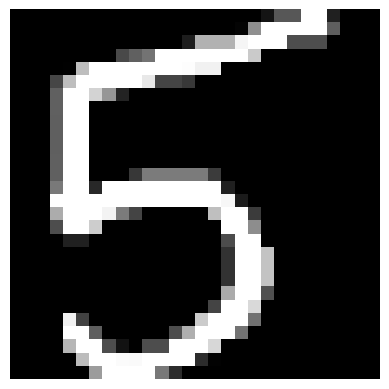

In [ ]:
img = load_and_preprocess_image("/content/img5.jpg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")

Predicted Digit: 9


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

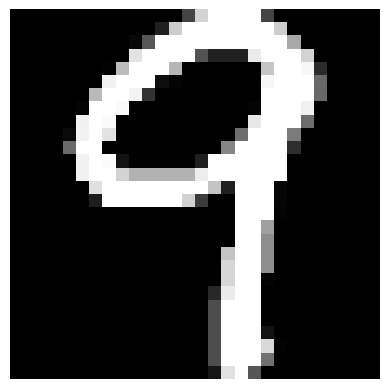

In [ ]:
img = load_and_preprocess_image("/content/img9.jpg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")

Predicted Digit: 7


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

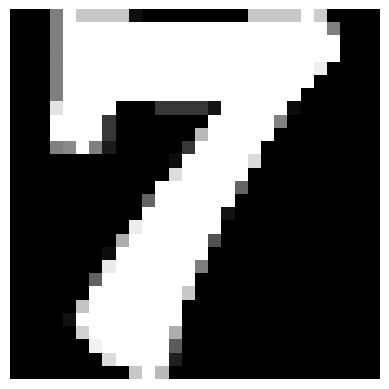

In [ ]:
img = load_and_preprocess_image("/content/image.jpg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")

Predicted Digit: 7


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

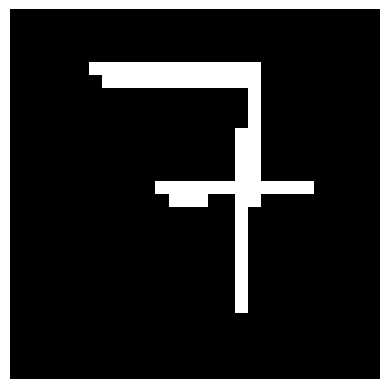

In [ ]:
img = load_and_preprocess_image("/content/wp.jpeg")

model.eval()
with torch.no_grad():
    pred = model(img).argmax(1).item()

print("Predicted Digit:", pred)

import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")

In [ ]:
torch.save(model.state_dict(), "cnn_mnist.pth")


In [ ]:
pip install streamlit streamlit-drawable-canvas torch torchvision opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [ ]:
torch.save(model.state_dict(), "cnn_mnist.pth")


In [ ]:
from google.colab import files
uploaded = files.upload()

for name in uploaded.keys():
    img = load_and_preprocess_image(name)

    model.eval()
    with torch.no_grad():
        pred = model(img).argmax(1).item()

    print("Predicted Digit:", pred)


Saving img9.jpg to img9 (1).jpg
Predicted Digit: 9


Saving img3.jpg to img3 (1).jpg

File: img3 (1).jpg
Predicted Digit: 3


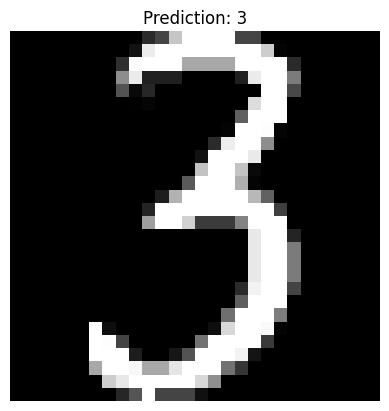

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

def test_new_images():
    uploaded = files.upload()

    for name in uploaded.keys():
        img = load_and_preprocess_image(name)

        model.eval()
        with torch.no_grad():
            pred = model(img).argmax(1).item()

        print("\nFile:", name)
        print("Predicted Digit:", pred)

        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Prediction: {pred}")
        plt.axis("off")
        plt.show()

# call function
test_new_images()


In [ ]:
from google.colab import files
uploaded = files.upload()

for name in uploaded.keys():
    img = load_and_preprocess_image(name)

    model.eval()
    with torch.no_grad():
        pred = model(img).argmax(1).item()

    print("Predicted Digit:", pred)

Saving img5.jpg to img5 (1).jpg
Predicted Digit: 5


In [ ]:
from google.colab import files
uploaded = files.upload()

for name in uploaded.keys():
    img = load_and_preprocess_image(name)

    model.eval()
    with torch.no_grad():
        pred = model(img).argmax(1).item()

    print("Predicted Digit:", pred)

Saving img9.jpg to img9 (3).jpg
Predicted Digit: 9


Saving wp.jpeg to wp (1).jpeg

File: wp (1).jpeg
Predicted Digit: 7


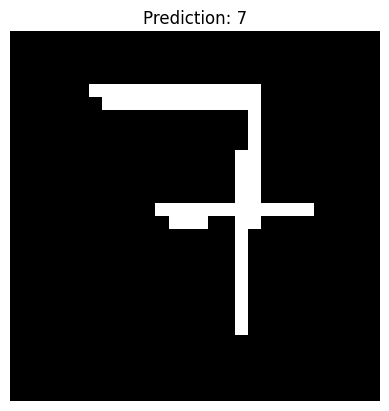

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

def test_new_images():
    uploaded = files.upload()

    for name in uploaded.keys():
        img = load_and_preprocess_image(name)

        model.eval()
        with torch.no_grad():
            pred = model(img).argmax(1).item()

        print("\nFile:", name)
        print("Predicted Digit:", pred)

        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Prediction: {pred}")
        plt.axis("off")
        plt.show()

# call function
test_new_images()

In [ ]:
!pip install opencv-python

import cv2, numpy as np, torch

def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    _, img = cv2.threshold(
        img, 0, 255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    coords = cv2.findNonZero(img)
    x,y,w,h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    size = max(w,h)
    square = np.zeros((size,size), dtype=np.uint8)
    square[(size-h)//2:(size-h)//2+h,
           (size-w)//2:(size-w)//2+w] = img

    img = cv2.resize(square,(28,28)) / 255.0
    img = torch.tensor(img,dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    img = (img-0.5)/0.5
    return img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 18.4 MB/s eta 0:00:00
